In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (9,339 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMG_DIR = '/content/drive/MyDrive/Machine_Learning/images-ocr/images/'

In [5]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

## Persiapan gambar

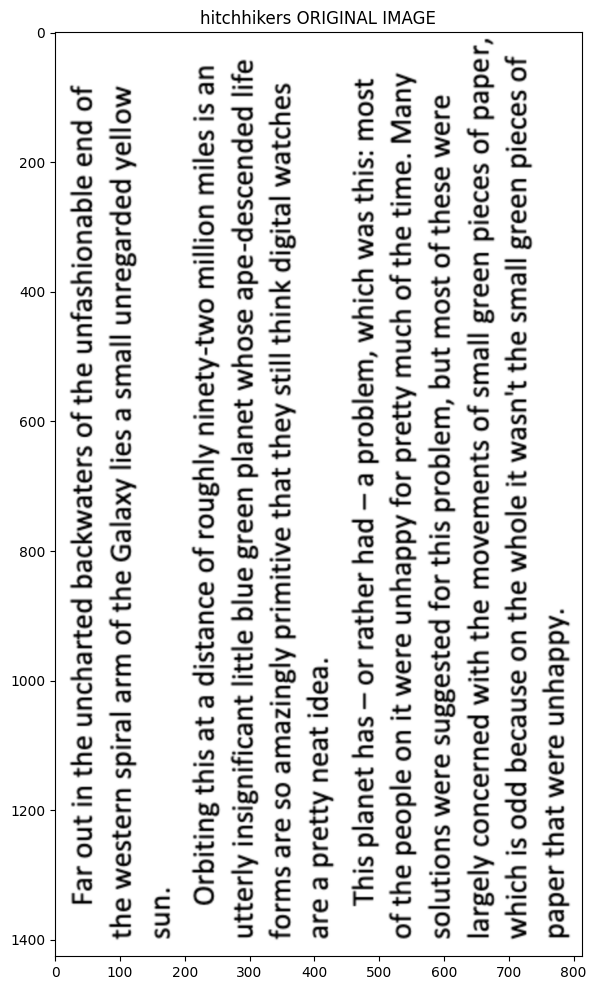

In [10]:
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png') # Memperoleh citra dengan detail file berdasarkan jalur dari IMG_DIR

b,g,r = cv2.split(image) # Mengambil value channel b, g dan r
rgb_img = cv2.merge([r,g,b]) # Menggabungkan value b, g, r dengan susunan baru menjadi r, g, dan b

plt.figure(figsize=(12, 12))
plt.imshow(rgb_img) # Memilih citra yang akan ditampilkan dengan plt
plt.title('hitchhikers ORIGINAL IMAGE') # Menambahkan judul pada plt
plt.show() # Menampilkan plot

## Deteksi Orientasi dan Skrip

In [12]:
osd = pytesseract.image_to_osd(rgb_img, output_type=Output.DICT) # Dapatkan Struktur Data dari gambar
rotate_angle = osd['rotate'] # Dapatkan orientasi teks berupa rotasi
script = osd['script'] # Dapatkan orientasi teks jenis script
print(f'Detail Image: {osd}')
print(f'Rotasi      : {rotate_angle} derajat')
print(f'Jenis Script: {script}')

Detail Image: {'page_num': 0, 'orientation': 270, 'rotate': 90, 'orientation_conf': 17.9, 'script': 'Latin', 'script_conf': 2.25}
Rotasi      : 90 derajat
Jenis Script: Latin
